# 5. Сглаживание временного ряда на основе простых и экспоненциальных скользящих средних

https://towardsdatascience.com/trading-toolbox-02-wma-ema-62c22205e2a9

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
os.chdir("C:/Users/HP/Documents/analysis/TS/data/")

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
datafile='cs-movavg.csv'

data=pd.read_csv(datafile, index_col='Date')
data.index=pd.to_datetime(data.index)

data=data.drop(columns='Unnamed: 0')

data

,Price,10-day SMA,10-day WMA,Smoothing Constant 2/(10 + 1),10-day EMA
Date,,,,,
2010-03-24,22.273,NaN,NaN,NaN,NaN
2010-03-25,22.194,NaN,NaN,NaN,NaN
2010-03-26,22.085,NaN,NaN,NaN,NaN
2010-03-29,22.174,NaN,NaN,NaN,NaN
2010-03-30,22.184,NaN,NaN,NaN,NaN
2010-03-31,22.134,NaN,NaN,NaN,NaN
2010-04-01,22.234,NaN,NaN,NaN,NaN
2010-04-05,22.432,NaN,NaN,NaN,NaN
2010-04-06,22.244,NaN,NaN,NaN,NaN


In [5]:
weights=np.arange(1,11)
weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
wma10=data['Price'].rolling(10).apply(lambda prices: np.dot(prices,weights)/weights.sum(),raw=True)
wma10.head(20)

Date
2010-03-24          NaN
2010-03-25          NaN
2010-03-26          NaN
2010-03-29          NaN
2010-03-30          NaN
2010-03-31          NaN
2010-04-01          NaN
2010-04-05          NaN
2010-04-06          NaN
2010-04-07    22.246473
2010-04-08    22.233618
2010-04-09    22.266382
2010-04-12    22.293527
2010-04-13    22.356909
2010-04-14    22.547800
2010-04-15    22.843927
2010-04-16    23.050818
2010-04-19    23.244455
2010-04-20    23.434455
2010-04-21    23.535582
Name: Price, dtype: float64

In [7]:
data['Our 10-day WMA'] = np.round(wma10, decimals=3)
data[['Price', '10-day WMA', 'Our 10-day WMA']].head(20)

,Price,10-day WMA,Our 10-day WMA
Date,,,
2010-03-24,22.273,NaN,NaN
2010-03-25,22.194,NaN,NaN
2010-03-26,22.085,NaN,NaN
2010-03-29,22.174,NaN,NaN
2010-03-30,22.184,NaN,NaN
2010-03-31,22.134,NaN,NaN
2010-04-01,22.234,NaN,NaN
2010-04-05,22.432,NaN,NaN
2010-04-06,22.244,NaN,NaN


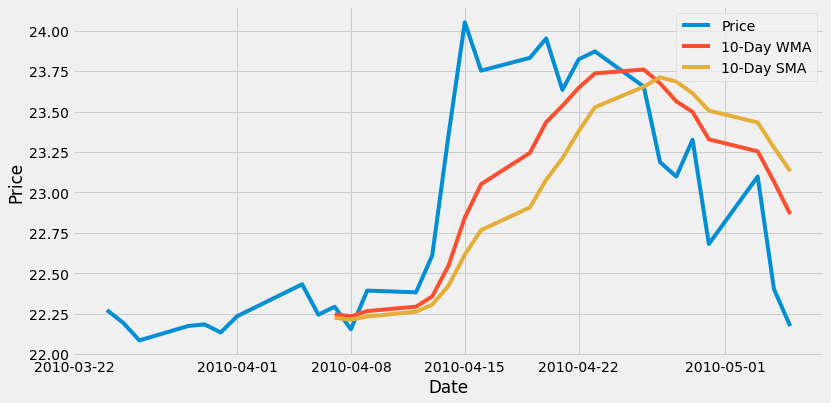

In [8]:
sma10 = data['Price'].rolling(10).mean()

plt.figure(figsize = (12,6))

plt.plot(data['Price'], label="Price")
plt.plot(wma10, label="10-Day WMA")
plt.plot(sma10, label="10-Day SMA")

plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

plt.show()

In [9]:
ema10 = data['Price'].ewm(span=10).mean()
ema10.head(10)

Date
2010-03-24    22.273000
2010-03-25    22.229550
2010-03-26    22.171442
2010-03-29    22.172285
2010-03-30    22.175648
2010-03-31    22.164830
2010-04-01    22.181498
2010-04-05    22.238488
2010-04-06    22.239687
2010-04-07    22.250886
Name: Price, dtype: float64

In [10]:
data['Our 10-day EMA'] = np.round(ema10, decimals=3)
data[['Price', '10-day EMA', 'Our 10-day EMA']].head(20)

,Price,10-day EMA,Our 10-day EMA
Date,,,
2010-03-24,22.273,NaN,22.273
2010-03-25,22.194,NaN,22.230
2010-03-26,22.085,NaN,22.171
2010-03-29,22.174,NaN,22.172
2010-03-30,22.184,NaN,22.176
2010-03-31,22.134,NaN,22.165
2010-04-01,22.234,NaN,22.181
2010-04-05,22.432,NaN,22.238
2010-04-06,22.244,NaN,22.240


In [11]:
modPrice = data['Price'].copy()
modPrice.iloc[0:10] = sma10[0:10]
modPrice.head(20)

Date
2010-03-24        NaN
2010-03-25        NaN
2010-03-26        NaN
2010-03-29        NaN
2010-03-30        NaN
2010-03-31        NaN
2010-04-01        NaN
2010-04-05        NaN
2010-04-06        NaN
2010-04-07    22.2247
2010-04-08    22.1540
2010-04-09    22.3930
2010-04-12    22.3820
2010-04-13    22.6110
2010-04-14    23.3560
2010-04-15    24.0520
2010-04-16    23.7530
2010-04-19    23.8320
2010-04-20    23.9520
2010-04-21    23.6340
Name: Price, dtype: float64

In [12]:
ema10alt = modPrice.ewm(span=10, adjust=False).mean()

In [13]:
data['Our 2nd 10-Day EMA'] = np.round(ema10alt, decimals=3)
data[['Price', '10-day EMA', 'Our 10-day EMA', 'Our 2nd 10-Day EMA']].head(20)

,Price,10-day EMA,Our 10-day EMA,Our 2nd 10-Day EMA
Date,,,,
2010-03-24,22.273,NaN,22.273,NaN
2010-03-25,22.194,NaN,22.230,NaN
2010-03-26,22.085,NaN,22.171,NaN
2010-03-29,22.174,NaN,22.172,NaN
2010-03-30,22.184,NaN,22.176,NaN
2010-03-31,22.134,NaN,22.165,NaN
2010-04-01,22.234,NaN,22.181,NaN
2010-04-05,22.432,NaN,22.238,NaN
2010-04-06,22.244,NaN,22.240,NaN


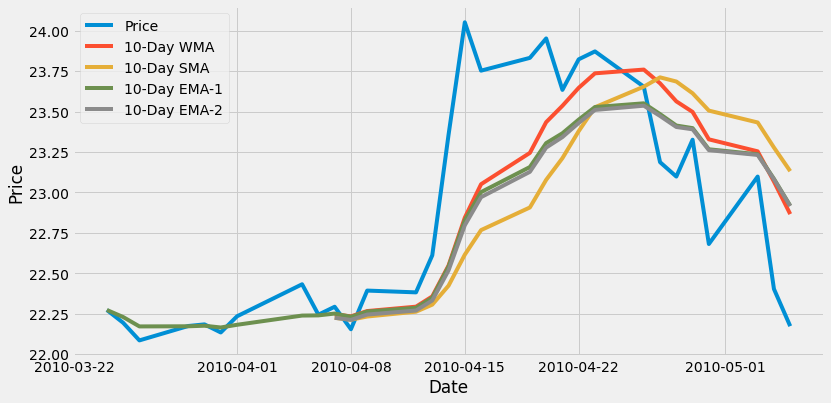

In [14]:
plt.figure(figsize = (12,6))

plt.plot(data['Price'], label="Price")
plt.plot(wma10, label="10-Day WMA")
plt.plot(sma10, label="10-Day SMA")
plt.plot(ema10, label="10-Day EMA-1")
plt.plot(ema10alt, label="10-Day EMA-2")

plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

plt.show()